This is used to recommond specific crops based on N, P, K, and pH levels.

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

This project is heavily inspired by Gladiator07/Harvestify

In [ ]:
PATH = '/content/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()

,N,P,K,ph,label
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [ ]:
df.tail()

,N,P,K,ph,label
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee
2199,104,18,30,6.779833,coffee


In [ ]:
df.size

11000

In [ ]:
df.shape

(2200, 5)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'ph', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
#df.types

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

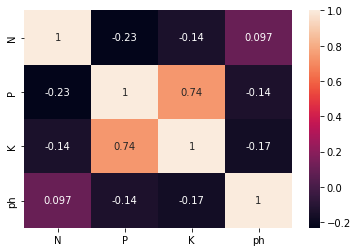

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','ph']]
target = df['label']
labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  70.22727272727273
              precision    recall  f1-score   support

       apple       0.48      1.00      0.65        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.31      0.48        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.54      1.00      0.70        21
      coffee       0.88      0.95      0.91        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      0.22      0.36        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.64      1.00      0.78        14
      lentil       0.48      0.91      0.63        23
       maize       1.00      0.86      0.92        21
       mango       0.92      0.42      0.58        26
   mothbeans       0.40      0.63      0.49        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       0.88      0.30      0.45        23
      orange       1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.71818182, 0.72272727, 0.71363636, 0.7       , 0.69090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.7840909090909091
              precision    recall  f1-score   support

       apple       0.55      0.85      0.67        13
      banana       1.00      1.00      1.00        17
   blackgram       0.55      0.69      0.61        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.68      0.71      0.70        21
      coffee       1.00      0.95      0.98        22
      cotton       0.91      1.00      0.95        20
      grapes       0.82      0.50      0.62        18
        jute       0.83      0.71      0.77        28
 kidneybeans       0.61      1.00      0.76        14
      lentil       0.65      0.48      0.55        23
       maize       1.00      0.95      0.98        21
       mango       0.80      0.77      0.78        26
   mothbeans       0.92      0.63      0.75        19
    mungbean       0.91      0.83      0.87        24
   muskmelon       0.56      0.43      0.49        23
      orange       1.00      1.00 

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score


array([0.75681818, 0.80454545, 0.8       , 0.77272727, 0.78636364])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.47045454545454546
              precision    recall  f1-score   support

       apple       0.33      0.38      0.36        13
      banana       1.00      0.71      0.83        17
   blackgram       0.38      0.19      0.25        16
    chickpea       1.00      0.48      0.65        21
     coconut       0.62      0.38      0.47        21
      coffee       0.90      0.82      0.86        22
      cotton       0.94      0.75      0.83        20
      grapes       0.38      0.17      0.23        18
        jute       0.80      0.57      0.67        28
 kidneybeans       0.06      0.57      0.11        14
      lentil       0.25      0.09      0.13        23
       maize       0.90      0.43      0.58        21
       mango       0.60      0.46      0.52        26
   mothbeans       0.36      0.47      0.41        19
    mungbean       0.44      0.17      0.24        24
   muskmelon       0.58      0.30      0.40        23
      orange       1.00      0.55      0.

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.44772727, 0.52727273, 0.5       , 0.55681818, 0.54772727])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.5522727272727272
              precision    recall  f1-score   support

       apple       0.43      0.46      0.44        13
      banana       0.85      1.00      0.92        17
   blackgram       0.30      0.44      0.36        16
    chickpea       0.91      1.00      0.95        21
     coconut       0.28      0.24      0.26        21
      coffee       0.84      0.95      0.89        22
      cotton       1.00      0.85      0.92        20
      grapes       0.59      0.72      0.65        18
        jute       0.42      0.18      0.25        28
 kidneybeans       0.27      0.43      0.33        14
      lentil       0.46      0.48      0.47        23
       maize       0.78      1.00      0.88        21
       mango       0.46      0.23      0.31        26
   mothbeans       0.34      0.58      0.43        19
    mungbean       0.33      0.08      0.13        24
   muskmelon       0.45      0.22      0.29        23
      orange       0.96   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.57727273, 0.59545455, 0.59772727, 0.61363636, 0.59090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.7886363636363637
              precision    recall  f1-score   support

       apple       0.48      0.77      0.59        13
      banana       1.00      1.00      1.00        17
   blackgram       0.73      0.69      0.71        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.65      0.81      0.72        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       0.70      0.39      0.50        18
        jute       0.78      0.50      0.61        28
 kidneybeans       0.67      1.00      0.80        14
      lentil       0.52      0.52      0.52        23
       maize       1.00      1.00      1.00        21
       mango       0.79      0.73      0.76        26
   mothbeans       0.82      0.74      0.78        19
    mungbean       0.87      0.83      0.85        24
   muskmelon       0.70      0.70      0.70        23
      orange       1.00      1.00      1.00

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.77045455, 0.81818182, 0.79090909, 0.80227273, 0.79090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
#Input = [[N,P,K,pH,temp,humidity,rainfall]]
# N (ratio of Nitrogen content in soil)
# P (ratio of Phosphorous content in soil)
# K (ratio of Potassium content in soil)
# ph (ph value of soil)
# temperature (temperature in degree Celsius)
# humidity (relative humidity in %)
# rainfall (rainfall in mm)


data = np.array([[0,0,0,0]])
prediction = RF.predict(data)
print(prediction)

['orange']
